# me 8.99 Homework - Dino or Dragon - Local

## Getting files

In [2]:
!dir .\train\dino\*.*

 Volume in drive C has no label.
 Volume Serial Number is E8A5-BC16

 Directory of C:\Users\alain\Documents\prv\IT\mlzc-cnn\train\dino

21/11/2022  14:09    <DIR>          .
21/11/2022  14:09    <DIR>          ..
25/09/2022  12:47            56,897 008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg
25/09/2022  12:47            69,579 00b7f1d3-9265-4971-9c51-4686ce97eadd.jpg
25/09/2022  12:47            44,839 014d6937-456a-4d13-bf79-2518ef128ff1.jpg
25/09/2022  12:47            60,970 0151c4fc-b507-4f1d-8de6-c2f2c3aa362d.jpg
25/09/2022  12:47            55,606 01d2e297-ae2b-41c0-833b-688f51ce5f22.jpg
25/09/2022  12:47            54,669 01e736f2-4de6-441a-97e9-3542c8484cef.jpg
25/09/2022  12:47            65,166 025064bc-4bac-495a-84a3-8aed84a8d7c5.jpg
25/09/2022  12:47            58,374 025bf316-ec72-40cf-9350-ca3580d2786b.jpg
25/09/2022  12:47            59,834 0262c96d-f37d-425a-ae95-00e01e0cd8f5.jpg
25/09/2022  12:47            48,858 0284b36b-b92c-4c1d-a8d7-4ba26f7bfe83.jpg
25/09/2022  12:47

In [3]:
!dir .\train\dragon\*.*

 Volume in drive C has no label.
 Volume Serial Number is E8A5-BC16

 Directory of C:\Users\alain\Documents\prv\IT\mlzc-cnn\train\dragon

21/11/2022  14:09    <DIR>          .
21/11/2022  14:09    <DIR>          ..
25/09/2022  12:47            40,289 000bf8e2-6467-462f-b4c8-61c78f94241b.jpg
25/09/2022  12:47            85,370 0065e007-931f-4a67-ae27-7708e090cb26.jpg
25/09/2022  12:47            45,779 00af6fd7-5484-4e59-b974-761a5c36a16e.jpg
25/09/2022  12:47            34,465 00fb9fec-4f3e-454e-b804-7709f98d87fe.jpg
25/09/2022  12:47            39,154 011689fa-0178-4721-bcb0-6e63c6814a98.jpg
25/09/2022  12:47            56,884 01ca280a-e99c-457f-9eac-68d280e2569c.jpg
25/09/2022  12:47            66,223 0226f61b-95d8-4aaf-9c4a-b1d2177edb38.jpg
25/09/2022  12:47            57,619 024eadf4-3a93-4c4b-8e46-01c36700906e.jpg
25/09/2022  12:47            46,252 0290e78f-5d8d-454f-953a-72f831eee71e.jpg
25/09/2022  12:47            85,434 03c4c938-02b3-40f6-b40b-847eac02657e.jpg
25/09/2022  12:

## Imports

In [43]:
import numpy as npy
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
import tensorflow as tsf
from tensorflow import keras

In [45]:
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
tsf.__version__

'2.11.0'

### Test load image(s)

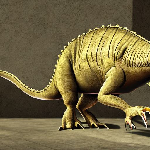

In [47]:
path = './train/dino/'
name = 'fd65880b-d3e4-412a-85a3-2270811369c2.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(150, 150))

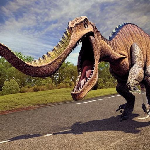

In [48]:
name = '008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(150, 150))

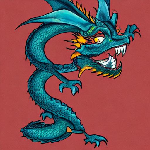

In [49]:
path = './train/dragon/'
name = '76ed968f-8c7f-4b77-8427-44f9743980f5.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(150, 150))

## Create Model

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
- Use 32 filters
- Kernel size should be (3, 3) (that's the size of the filter)
- Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
- Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
- The output layer should have an activation - use the appropriate activation for the binary classification case
- As optimizer use SGD with the following parameters:
SGD(lr=0.002, momentum=0.8)



In [50]:
input_shape = (150, 150, 3)

In [51]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu',
                        input_shape=input_shape )
         )
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Q1 = binary crossentropy

In [52]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [53]:
model.name

'sequential_1'

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

## Q2 = 11214912

## Image Generator

In [55]:
# Training
idgTra = ImageDataGenerator(rescale=1./255)
idgTra.rescale

0.00392156862745098

In [56]:
genTra = idgTra.flow_from_directory(
    'train/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 1594 images belonging to 2 classes.


In [57]:
genTra.batch_size

20

In [58]:
# Validation
idgVal = ImageDataGenerator(rescale=1./255)
idgVal.rescale

0.00392156862745098

In [59]:
genVal = idgVal.flow_from_directory(
    'test/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 394 images belonging to 2 classes.


## First Training

In [60]:
history = model.fit(
    genTra,
    epochs=10,
    validation_data=genVal
)

Epoch 1/10
80/80 [==============================] - 18s 219ms/step - loss: 0.6744 - acc: 0.5816 - val_loss: 0.6029 - val_acc: 0.6853
Epoch 2/10
80/80 [==============================] - 17s 215ms/step - loss: 0.5573 - acc: 0.7465 - val_loss: 0.4867 - val_acc: 0.7893
Epoch 3/10
80/80 [==============================] - 19s 238ms/step - loss: 0.4791 - acc: 0.7861 - val_loss: 0.4169 - val_acc: 0.8299
Epoch 4/10
80/80 [==============================] - 20s 245ms/step - loss: 0.3930 - acc: 0.8369 - val_loss: 0.3665 - val_acc: 0.8604
Epoch 5/10
80/80 [==============================] - 20s 252ms/step - loss: 0.3692 - acc: 0.8419 - val_loss: 0.3466 - val_acc: 0.8553
Epoch 6/10
80/80 [==============================] - 20s 251ms/step - loss: 0.3133 - acc: 0.8714 - val_loss: 0.3758 - val_acc: 0.8401
Epoch 7/10
80/80 [==============================] - 20s 251ms/step - loss: 0.2872 - acc: 0.8839 - val_loss: 0.3141 - val_acc: 0.8604
Epoch 8/10
80/80 [==============================] - 20s 252ms/step - 

In [61]:
lstAccTra = history.history['acc']
lstAccTra

[0.5815558433532715,
 0.7465495467185974,
 0.7860727906227112,
 0.836888313293457,
 0.8419071435928345,
 0.8713927268981934,
 0.883939802646637,
 0.904015064239502,
 0.9121706485748291,
 0.9341279864311218]

In [62]:
npy.median(lstAccTra).round(3)

0.857

## Q3 = +/- 0.904

In [63]:
lstLosTra = history.history['loss']
lstLosTra

[0.6744048595428467,
 0.5572527647018433,
 0.47911402583122253,
 0.3930329382419586,
 0.36924755573272705,
 0.31328901648521423,
 0.2871968746185303,
 0.2532055974006653,
 0.2387678325176239,
 0.20521919429302216]

In [64]:
npy.std(lstLosTra).round(2)

0.14

## Q4 = +/- 0.13

## Data Augmentation

Add the following augmentations to your training data generator:

- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'

In [65]:
# Training with augemnted data
idgTra = ImageDataGenerator(
    rescale=1./255 ,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [66]:
genTra = idgTra.flow_from_directory(
    'train/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 1594 images belonging to 2 classes.


In [67]:
history = model.fit(
    genTra,
    epochs=20,
    validation_data=genVal ,
    initial_epoch=10
)

Epoch 11/20
80/80 [==============================] - 25s 307ms/step - loss: 0.4441 - acc: 0.7986 - val_loss: 0.5413 - val_acc: 0.7563
Epoch 12/20
80/80 [==============================] - 24s 293ms/step - loss: 0.4374 - acc: 0.8043 - val_loss: 0.4934 - val_acc: 0.7741
Epoch 13/20
80/80 [==============================] - 26s 319ms/step - loss: 0.4139 - acc: 0.8087 - val_loss: 0.3968 - val_acc: 0.8249
Epoch 14/20
80/80 [==============================] - 25s 307ms/step - loss: 0.4552 - acc: 0.7923 - val_loss: 0.4525 - val_acc: 0.7716
Epoch 15/20
80/80 [==============================] - 25s 308ms/step - loss: 0.4110 - acc: 0.8199 - val_loss: 0.4537 - val_acc: 0.7995
Epoch 16/20
80/80 [==============================] - 24s 305ms/step - loss: 0.3859 - acc: 0.8432 - val_loss: 0.4040 - val_acc: 0.8173
Epoch 17/20
80/80 [==============================] - 24s 303ms/step - loss: 0.3759 - acc: 0.8369 - val_loss: 0.3272 - val_acc: 0.8629
Epoch 18/20
80/80 [==============================] - 24s 302ms

In [68]:
lstLosVal = history.history['val_loss']
lstLosVal

[0.5412830114364624,
 0.4933795928955078,
 0.39680829644203186,
 0.45252788066864014,
 0.45370030403137207,
 0.4039663076400757,
 0.32715460658073425,
 0.46644535660743713,
 0.599757730960846,
 0.34055453538894653]

In [69]:
npy.mean(lstLosVal).round(2)

0.45

## Q5 : +/- 0.45

In [70]:
lstAccVal = history.history['val_acc']
lstAccVal

[0.7563451528549194,
 0.7741116881370544,
 0.8248730897903442,
 0.7715736031532288,
 0.799492359161377,
 0.817258894443512,
 0.8629441857337952,
 0.796954333782196,
 0.7664974331855774,
 0.8502538204193115]

In [71]:
lstAccVal[-5:]

[0.817258894443512,
 0.8629441857337952,
 0.796954333782196,
 0.7664974331855774,
 0.8502538204193115]

In [72]:
npy.average(lstAccVal[-5:]).round(2)

0.82

## Q6: +/- 0.82